In [2]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import datetime
import numpy as np 
from matplotlib import style
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os
%matplotlib inline

os.chdir('D:/Scholastic/Projects/COVID-19_Jobs_Paper/LSTM_Predictor')

Using TensorFlow backend.


In [3]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


(331, 6, 1)
Train on 297 samples, validate on 34 samples
Epoch 1/25
297/297 [==============================] - 1s 4ms/step - loss: 6.3514 - val_loss: 0.1150
Epoch 2/25
297/297 [==============================] - 0s 1ms/step - loss: 0.2653 - val_loss: 0.0333
Epoch 3/25
297/297 [==============================] - 0s 1ms/step - loss: 0.1574 - val_loss: 0.0335
Epoch 4/25
297/297 [==============================] - 0s 1ms/step - loss: 0.1675 - val_loss: 0.0080
Epoch 5/25
297/297 [==============================] - 0s 1ms/step - loss: 0.1307 - val_loss: 0.0152
Epoch 6/25
297/297 [==============================] - 0s 1ms/step - loss: 0.1243 - val_loss: 0.0484
Epoch 7/25
297/297 [==============================] - 0s 1ms/step - loss: 0.1182 - val_loss: 0.0668
Epoch 8/25
297/297 [==============================] - 0s 1ms/step - loss: 0.1286 - val_loss: 0.0076
Epoch 9/25
297/297 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.0411
Epoch 10/25
297/297 [======================

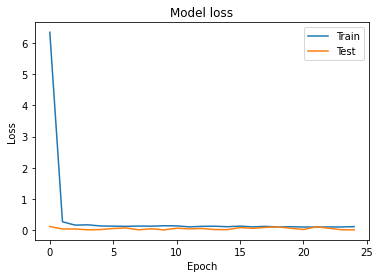

In [4]:
### Model 1
d1 = pd.read_excel('Data/Unemployment_Rate_India_1991-2019.xlsx')
df1 = d1.rename(columns = {"Year": "ds", "Unemployment Rate":"y"})
df1['ds'] = pd.to_datetime(df1['ds'], yearfirst=True)

# interpolate data to get it for months
new_df1 = df1.set_index('ds').resample('M').interpolate(method='linear', axis=0, limit=None, inplace=False,\
         limit_direction='forward', limit_area=None, downcast=None).reset_index()


train_data = new_df1.loc[:,'y'].values
train_data = train_data.reshape(-1,1)

time_steps = 6
X_train, y_train = create_dataset(train_data, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 6, 1))

print(X_train.shape)

# Build the model 
model1 = keras.Sequential()
model1.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units = 100))
model1.add(Dropout(0.2))
# Output layer
model1.add(Dense(units = 1))
# Compiling the model
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
history = model1.fit(X_train, y_train, epochs = 25, batch_size = 10, validation_split=0.1)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


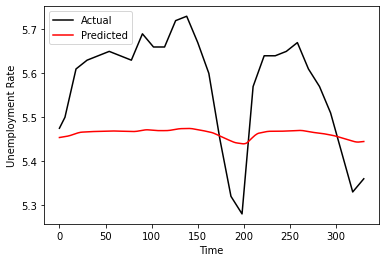

In [5]:

preds_1 = model1.predict(X_train)

plt.plot(y_train, color = 'black', label = 'Actual')
plt.plot(preds_1, color = 'red', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.savefig('Model_1.jpg')


(342, 6, 1)
Train on 307 samples, validate on 35 samples
Epoch 1/25
307/307 [==============================] - 1s 3ms/step - loss: 8.1801 - val_loss: 21.0391
Epoch 2/25
307/307 [==============================] - 0s 1ms/step - loss: 0.5755 - val_loss: 21.3291
Epoch 3/25
307/307 [==============================] - 0s 1ms/step - loss: 0.5698 - val_loss: 21.0928
Epoch 4/25
307/307 [==============================] - 0s 1ms/step - loss: 0.5825 - val_loss: 20.0070
Epoch 5/25
307/307 [==============================] - 0s 1ms/step - loss: 0.4983 - val_loss: 20.5461
Epoch 6/25
307/307 [==============================] - 0s 1ms/step - loss: 0.5121 - val_loss: 20.2108
Epoch 7/25
307/307 [==============================] - 0s 2ms/step - loss: 0.5195 - val_loss: 20.6910
Epoch 8/25
307/307 [==============================] - 0s 2ms/step - loss: 0.4834 - val_loss: 19.1650
Epoch 9/25
307/307 [==============================] - 0s 1ms/step - loss: 0.4991 - val_loss: 19.2943
Epoch 10/25
307/307 [=============

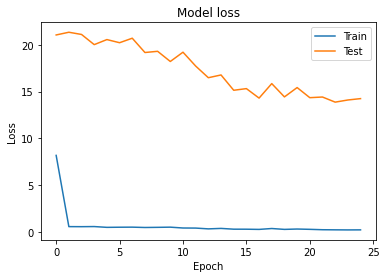

In [6]:
### Model 2
new_df2 = pd.read_csv('Data/Monthly_Unemployment_1991-2020.csv')
new_df2['ds'] = pd.to_datetime(new_df2['ds'], yearfirst=True)

train_data = new_df2.loc[:,'y'].values
train_data = train_data.reshape(-1,1)

time_steps = 6
X_train, y_train = create_dataset(train_data, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 6, 1))

print(X_train.shape)

# Build the model 
model2 = keras.Sequential()
model2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 100))
model2.add(Dropout(0.2))
# Output layer
model2.add(Dense(units = 1))
# Compiling the model
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
history = model2.fit(X_train, y_train, epochs = 25, batch_size = 10, validation_split=0.1)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

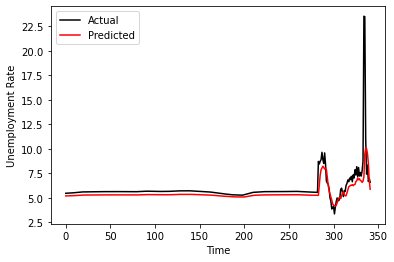

In [7]:
preds_2 = model2.predict(X_train)

plt.plot(y_train, color = 'black', label = 'Actual')
plt.plot(preds_2, color = 'red', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.savefig('Model_2.jpg')


In [8]:
train_data

array([[ 5.45      ],
       [ 5.45416667],
       [ 5.45833333],
       [ 5.4625    ],
       [ 5.46666667],
       [ 5.47083333],
       [ 5.475     ],
       [ 5.47916667],
       [ 5.48333333],
       [ 5.4875    ],
       [ 5.49166667],
       [ 5.49583333],
       [ 5.5       ],
       [ 5.50916667],
       [ 5.51833333],
       [ 5.5275    ],
       [ 5.53666667],
       [ 5.54583333],
       [ 5.555     ],
       [ 5.56416667],
       [ 5.57333333],
       [ 5.5825    ],
       [ 5.59166667],
       [ 5.60083333],
       [ 5.61      ],
       [ 5.61166667],
       [ 5.61333333],
       [ 5.615     ],
       [ 5.61666667],
       [ 5.61833333],
       [ 5.62      ],
       [ 5.62166667],
       [ 5.62333333],
       [ 5.625     ],
       [ 5.62666667],
       [ 5.62833333],
       [ 5.63      ],
       [ 5.63083333],
       [ 5.63166667],
       [ 5.6325    ],
       [ 5.63333333],
       [ 5.63416667],
       [ 5.635     ],
       [ 5.63583333],
       [ 5.63666667],
       [ 5

**Applying LSA to combine results of two models**

In [16]:
## Using Least Squares to combine both preds

f_data = pd.DataFrame(new_df2['y'][324:].reset_index())
f_data.drop('index', axis=1, inplace=True)

In [17]:
f_data = f_data.values.reshape(-1,1)
future_df, _ = create_dataset(f_data, 6) 


In [18]:
future_df

array([[ 7.02,  6.86,  7.2 ,  6.65,  7.35,  7.03],
       [ 6.86,  7.2 ,  6.65,  7.35,  7.03,  7.87],
       [ 7.2 ,  6.65,  7.35,  7.03,  7.87,  7.34],
       [ 6.65,  7.35,  7.03,  7.87,  7.34,  8.19],
       [ 7.35,  7.03,  7.87,  7.34,  8.19,  7.16],
       [ 7.03,  7.87,  7.34,  8.19,  7.16,  8.1 ],
       [ 7.87,  7.34,  8.19,  7.16,  8.1 ,  7.23],
       [ 7.34,  8.19,  7.16,  8.1 ,  7.23,  7.6 ],
       [ 8.19,  7.16,  8.1 ,  7.23,  7.6 ,  7.22],
       [ 7.16,  8.1 ,  7.23,  7.6 ,  7.22,  7.76],
       [ 8.1 ,  7.23,  7.6 ,  7.22,  7.76,  8.75],
       [ 7.23,  7.6 ,  7.22,  7.76,  8.75, 23.52],
       [ 7.6 ,  7.22,  7.76,  8.75, 23.52, 23.48],
       [ 7.22,  7.76,  8.75, 23.52, 23.48, 10.99],
       [ 7.76,  8.75, 23.52, 23.48, 10.99,  7.43],
       [ 8.75, 23.52, 23.48, 10.99,  7.43,  8.35],
       [23.52, 23.48, 10.99,  7.43,  8.35,  6.67],
       [23.48, 10.99,  7.43,  8.35,  6.67,  6.98]])

In [24]:
# reshape it [samples, time steps, features]
future_df = np.reshape(future_df, (future_df.shape[0], 6, 1))

preds_1 = model1.predict(future_df)
preds_2 = model2.predict(future_df)

from scipy.optimize import least_squares

xdata = np.transpose(np.array([preds_1,preds_2]))[0]
ydata = np.transpose(np.array(new_df2['y'][330:]))

In [26]:
xdata.shape, ydata.shape

((18, 2), (18,))

In [27]:
def func(params, xdata, ydata):
    return (ydata - np.dot(xdata, params))


params1 = least_squares(func, [0,0], args=(xdata, ydata), method='lm')
print("Soln:",params1.x)
print("Optimality:", params1.optimality)

params2 = least_squares(func, [0,0], args=(xdata, ydata), method='trf')
print("Soln:",params2.x)
print("Optimality:", params2.optimality)

params3 = least_squares(func, [0,0], args=(xdata, ydata), method='dogbox')
print("Soln:",params3.x)
print("Optimality:", params3.optimality)

Soln: [0.16389544 1.14768459]
Optimality: 3.615880928009574e-09
Soln: [0.16389543 1.1476846 ]
Optimality: 1.530045395270463e-06
Soln: [0.16389542 1.1476846 ]
Optimality: 1.4750494585769047e-06


In [28]:
res = np.dot(xdata, params2.x)
res_df = pd.DataFrame(res, columns=['yhat'])
LSA_preds = pd.concat([new_df2[330:].reset_index(), res_df], axis=1).drop('index',axis=1)
LSA_preds

,ds,y,yhat
0,2019-06-30,7.87,8.222679
1,2019-07-31,7.34,8.569014
2,2019-08-31,8.19,8.655999
3,2019-09-30,7.16,8.975978
4,2019-10-31,8.10,8.774331
5,2019-11-30,7.23,8.895681
6,2019-12-31,7.60,8.685455
7,2020-01-31,7.22,8.640680
8,2020-02-29,7.76,8.469250
9,2020-03-31,8.75,8.610493


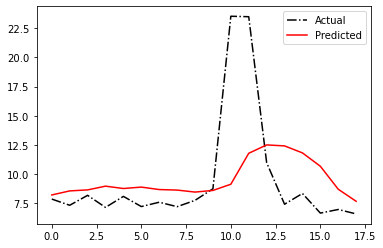

In [30]:
plt.plot(LSA_preds['y'], '-.k')
plt.plot(LSA_preds['yhat'], 'r')
plt.legend(['Actual', 'Predicted'])